In [1]:
import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords
from wordcloud import WordCloud,ImageColorGenerator
from PIL import Image
import matplotlib.pyplot as plt
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
#sadness (0), 
#joy (1),
#love (2),
#anger (3),
#fear (4),
#surprise (5)

In [2]:
df = pd.read_csv('text.csv')

In [3]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [4]:
df.head()

,text,label
0,i just feel really helpless and heavy hearted,4
1,ive enjoyed being able to slouch about relax a...,0
2,i gave up my internship with the dmrg and am f...,4
3,i dont know i feel so lost,0
4,i am a kindergarten teacher and i am thoroughl...,4


In [5]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [6]:
df.isnull().sum()

text     0
label    0
dtype: int64

##### Creating WordClouds

In [7]:
sadness_df = df[df['label'] == 0]

In [8]:
joy_df = df[df['label'] == 1]

In [9]:
love_df = df[df['label'] == 2]

In [10]:
anger_df = df[df['label'] == 3]

In [11]:
fear_df = df[df['label'] == 4]

In [12]:
surprise_df = df[df['label'] == 5]

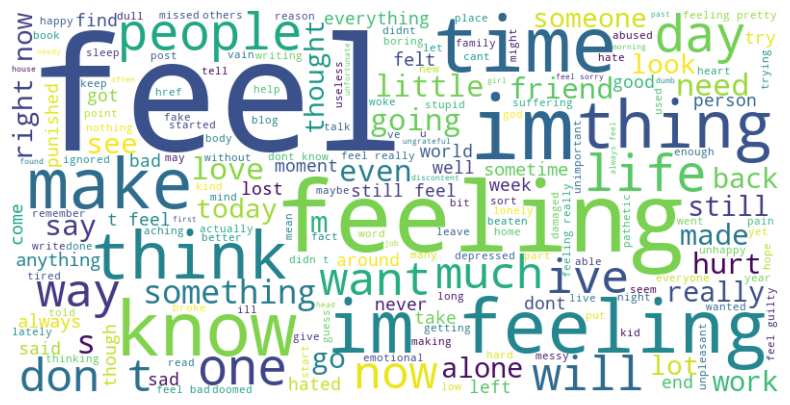

In [13]:
#sadness wordcloud
sadness_text = ' '.join(sadness_df['text'])

# Generate WordCloud
sadness_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(sadness_text)

# Display WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(sadness_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

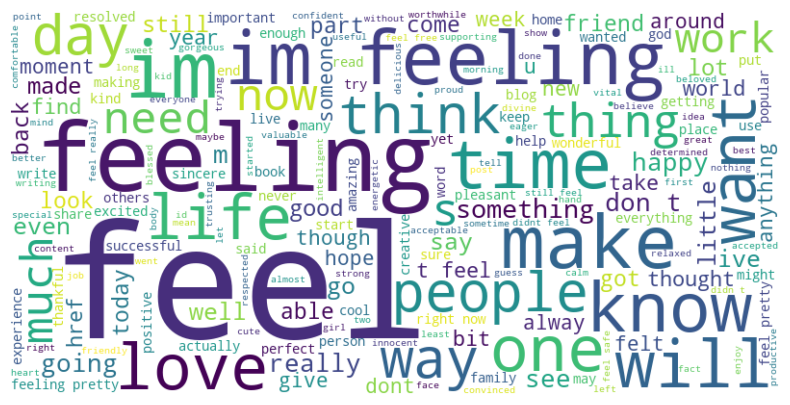

In [14]:
#joy wordcloud
joy_text = ' '.join(joy_df['text'])

# Generate WordCloud
joy_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(joy_text)

# Display WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(joy_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


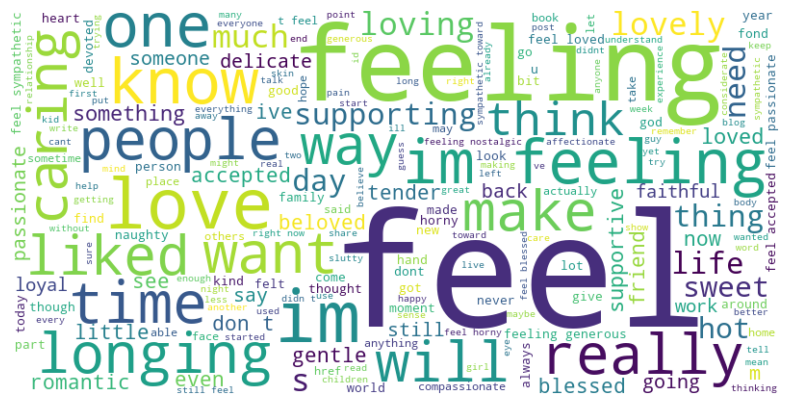

In [15]:
#love wordcloud
love_text = ' '.join(love_df['text'])

# Generate WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(love_text)

# Display WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


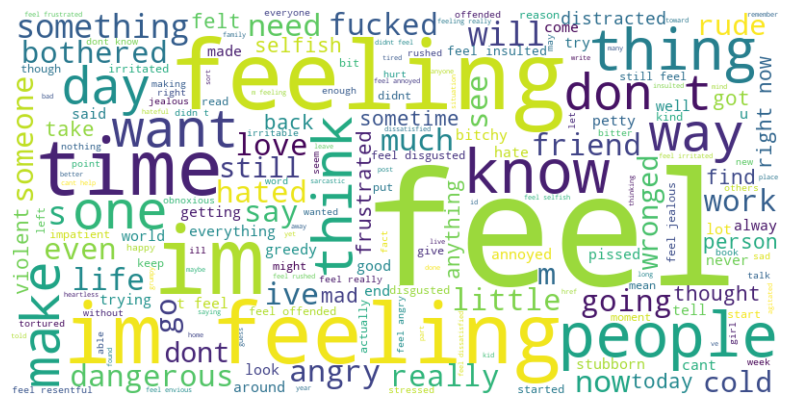

In [16]:
#anger wordcloud
anger_text = ' '.join(anger_df['text'])

# Generate WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(anger_text)

# Display WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


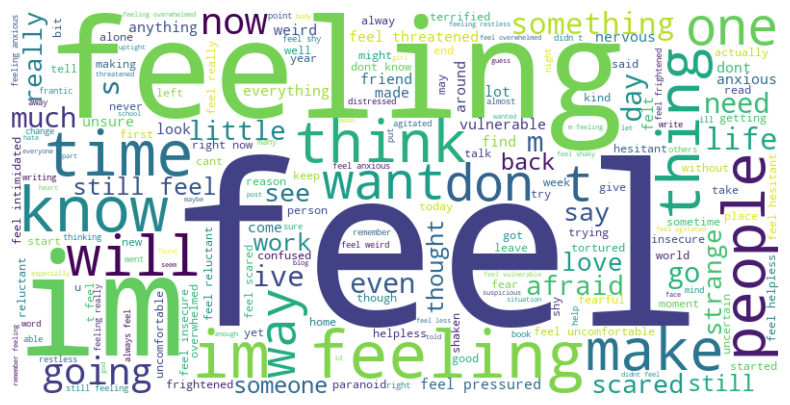

In [17]:
#fear wordcloud
fear_text = ' '.join(fear_df['text'])

# Generate WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(fear_text)

# Display WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


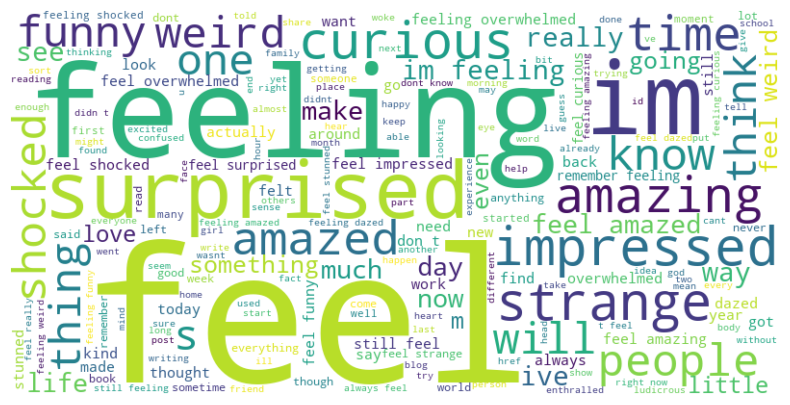

In [18]:
#surprise wordcloud
surprise_text = ' '.join(surprise_df['text'])

# Generate WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(surprise_text)

# Display WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


##### Data Preprocessing

In [19]:
#seperating text and label columns
X = df.drop(columns = 'label', axis = 1)
Y = df['label']

In [20]:
print(X,Y)

                                                     text
0           i just feel really helpless and heavy hearted
1       ive enjoyed being able to slouch about relax a...
2       i gave up my internship with the dmrg and am f...
3                              i dont know i feel so lost
4       i am a kindergarten teacher and i am thoroughl...
...                                                   ...
416804  i feel like telling these horny devils to find...
416805  i began to realize that when i was feeling agi...
416806  i feel very curious be why previous early dawn...
416807  i feel that becuase of the tyranical nature of...
416808  i think that after i had spent some time inves...

[416809 rows x 1 columns] 0         4
1         0
2         4
3         0
4         4
         ..
416804    2
416805    3
416806    5
416807    3
416808    5
Name: label, Length: 416809, dtype: int64


In [21]:
port_stem = PorterStemmer()

In [22]:
def stemming(text):
    stemmed_content = re.sub('[^a-zA-Z]', ' ', text) #this regex is looking for words from a-z only. no numbers. commas and fullstops are replaced with a space as indicated by ' '
    stemmed_content = stemmed_content.lower()#convert everything to lowercase letters
    stemmed_content = stemmed_content.split()#convert everything in text to a list
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')] #reducing words to their root word - but for loop is removing all stop words
    stemmed_content = ' '.join(stemmed_content)#joining all words
    return stemmed_content

In [23]:
df['text'] = df['text'].apply(stemming)

In [24]:
print(df['text'])

0                          feel realli helpless heavi heart
1         ive enjoy abl slouch relax unwind frankli need...
2                      gave internship dmrg feel distraught
3                                       dont know feel lost
4         kindergarten teacher thoroughli weari job take...
                                ...                        
416804    feel like tell horni devil find site suit sort...
416805    began realiz feel agit restless would thought ...
416806      feel curiou previou earli dawn time seek troubl
416807    feel becuas tyran natur govern el salvador sav...
416808    think spent time investig surround thing start...
Name: text, Length: 416809, dtype: object


In [25]:
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Zooby\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [26]:
#removing the base word feel as every emotion has the word feel mentioned in them the highest number of times
#also, the word feel itself is an emotion. It doesn't describe the "type" of emotion
words_to_remove = ['feel']

def remove_specific_words(text):
    words = word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in words_to_remove]
    return ' '.join(filtered_words)

df['text'] = df['text'].apply(remove_specific_words)

In [27]:
X = df['text'].values
Y = df['label'].values

In [28]:
print(X,Y)

['realli helpless heavi heart'
 'ive enjoy abl slouch relax unwind frankli need last week around end uni expo late start find bit listless never realli good thing'
 'gave internship dmrg distraught' ...
 'curiou previou earli dawn time seek troubl'
 'becuas tyran natur govern el salvador savag social condit gener peopl set thought run shoe shop miguel marmol testimoney abl work'
 'think spent time investig surround thing start curiou peopl'] [4 0 4 ... 5 3 5]


In [29]:
#converting text data to numbers
#main point of vectorizer is that it will create feature columns that it deems is important
vectorizer = TfidfVectorizer() #basically finds words that are repeating the most to assign a value to it. similarly its inversely doing the opposite where if certain words are showing up and it doesnt have a value, it doesnt provide it value
vectorizer.fit(X) #only fitting X bc Y already is all numbers (0,1)

X = vectorizer.transform(X) #convert all values to respective features

In [30]:
print(X)

  (0, 36847)	0.3215265307671131
  (0, 19829)	0.496020837870654
  (0, 19689)	0.6544996046952785
  (0, 19628)	0.47139610293752254
  (1, 49816)	0.16298410435358318
  (1, 48283)	0.32139688881465395
  (1, 47857)	0.2852665843712161
  (1, 45476)	0.13136671138460346
  (1, 42894)	0.14231443865165985
  (1, 41512)	0.37416889523325847
  (1, 37323)	0.19203432174389404
  (1, 36847)	0.12018158556081865
  (1, 30860)	0.1558171286280182
  (1, 30658)	0.14152800961344186
  (1, 26081)	0.22301891253429965
  (1, 25244)	0.1762552351421575
  (1, 25236)	0.16521024271776186
  (1, 22675)	0.13722105023945944
  (1, 18079)	0.14988189770484192
  (1, 16452)	0.2645594323398258
  (1, 15660)	0.15987076149481164
  (1, 14742)	0.3700033697637148
  (1, 13901)	0.1809428807192119
  (1, 13807)	0.16594401737514589
  (1, 4666)	0.14027545104268804
  :	:
  (416807, 40668)	0.17460973208707112
  (416807, 40641)	0.18829996527590173
  (416807, 40097)	0.16215825437018758
  (416807, 39205)	0.2145058795903493
  (416807, 38927)	0.304077556

##### Train test split

In [31]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = .2, stratify = Y )

##### Model Creation

In [32]:
logistic_regression = LogisticRegression(max_iter = 1000)

# Define the hyperparameter grid to search
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2'],              # Regularization type
    'solver': ['liblinear']       # Optimization algorithm: note you can test with other solvers such as saga but run-time for saga algorithm is huge
}

In [33]:
grid_search = GridSearchCV(logistic_regression, param_grid, cv=5, scoring='accuracy')



In [34]:
# Fit the model to the training data
grid_search.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
             scoring='accuracy')

In [35]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

##### Evaluating Model

In [36]:
# Make predictions on the test set using the best model
Y_pred = best_model.predict(X_test)

In [37]:
# Evaluate the accuracy of the best model
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Best Parameters: {best_params}")
print(f"Accuracy on Test Set: {accuracy:.2f}")

Best Parameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy on Test Set: 0.88


In [38]:
#Evaluating the model on test data
X_new = X_test[400]

prediction = best_model.predict(X_new)
print(prediction)

if (prediction[0]==0):
    print('sadness')
elif (prediction[0]==1):
    print('joy')
elif (prediction[0]==2):
    print('love')
elif (prediction[0]==3):
    print('anger')
elif (prediction[0]==4):
    print('fear')
elif (prediction[0]==5):
    print('surprise')

[0]
sadness


In [39]:
print (Y_test[400])

0
